In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")


In [36]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [38]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [39]:
df = df.dropna()

In [40]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [41]:
print(df["Dt_Customer"].head())

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object


In [42]:
parts = df["Dt_Customer"].str.split("-", n=3,expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
print(df[["day",'month','year']].head())

   day  month  year
0    4      9  2012
1    8      3  2014
2   21      8  2013
3   10      2  2014
4   19      1  2014


In [43]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
day                      31
month                    12
year                      3
dtype: int64

In [44]:
df = df.drop(['Z_Revenue','Z_CostContact','Dt_Customer'],axis =1)

In [45]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,2014


In [46]:
#VISUALIZATION

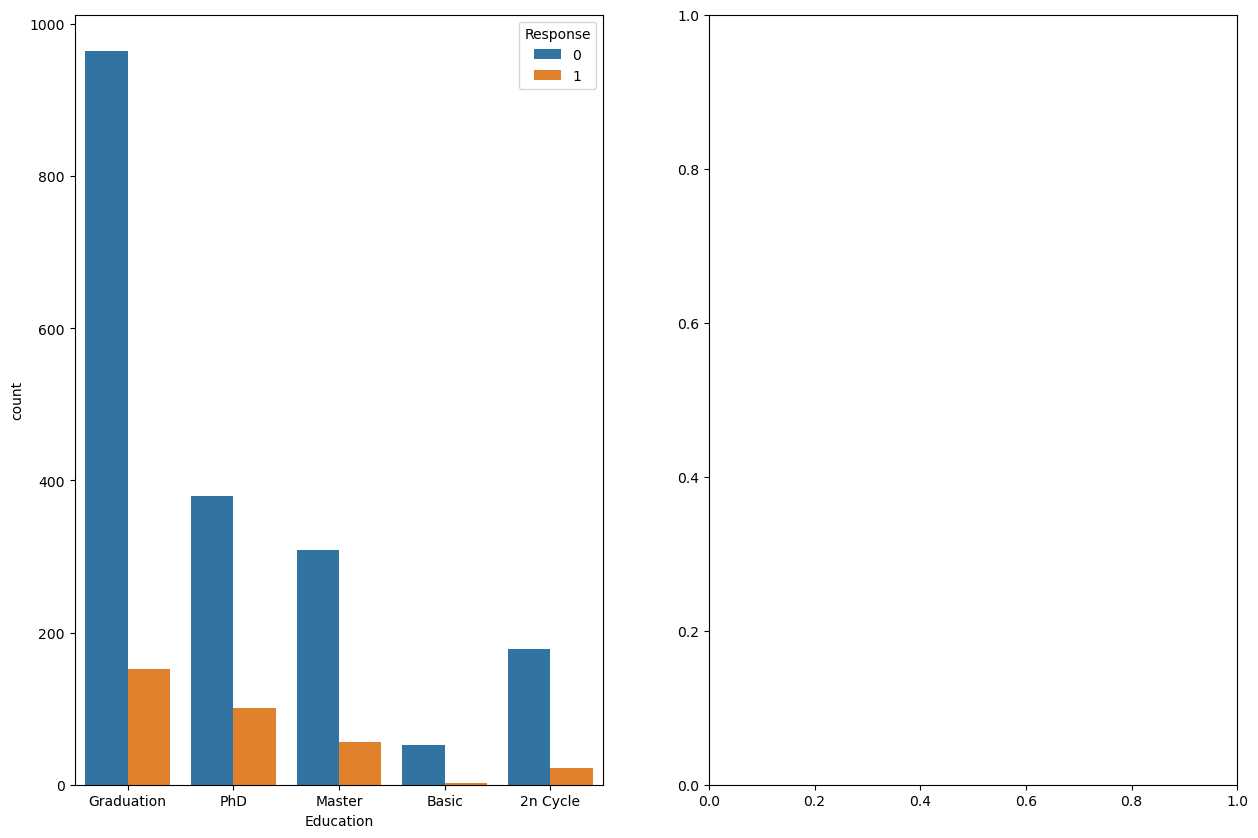

In [52]:
fig, axes = plt.subplots(1,2,figsize =(15,10))
for i, col in enumerate(['Education']):
    sb.countplot(x = col,hue = 'Response', data = df, ax= axes[i])
plt.show()

In [53]:
print(df['Income'].min())
print(df['Income'].max())


1730.0
666666.0


In [55]:
print(df['Year_Birth'].min())
print(df['Year_Birth'].max())

1893
1996


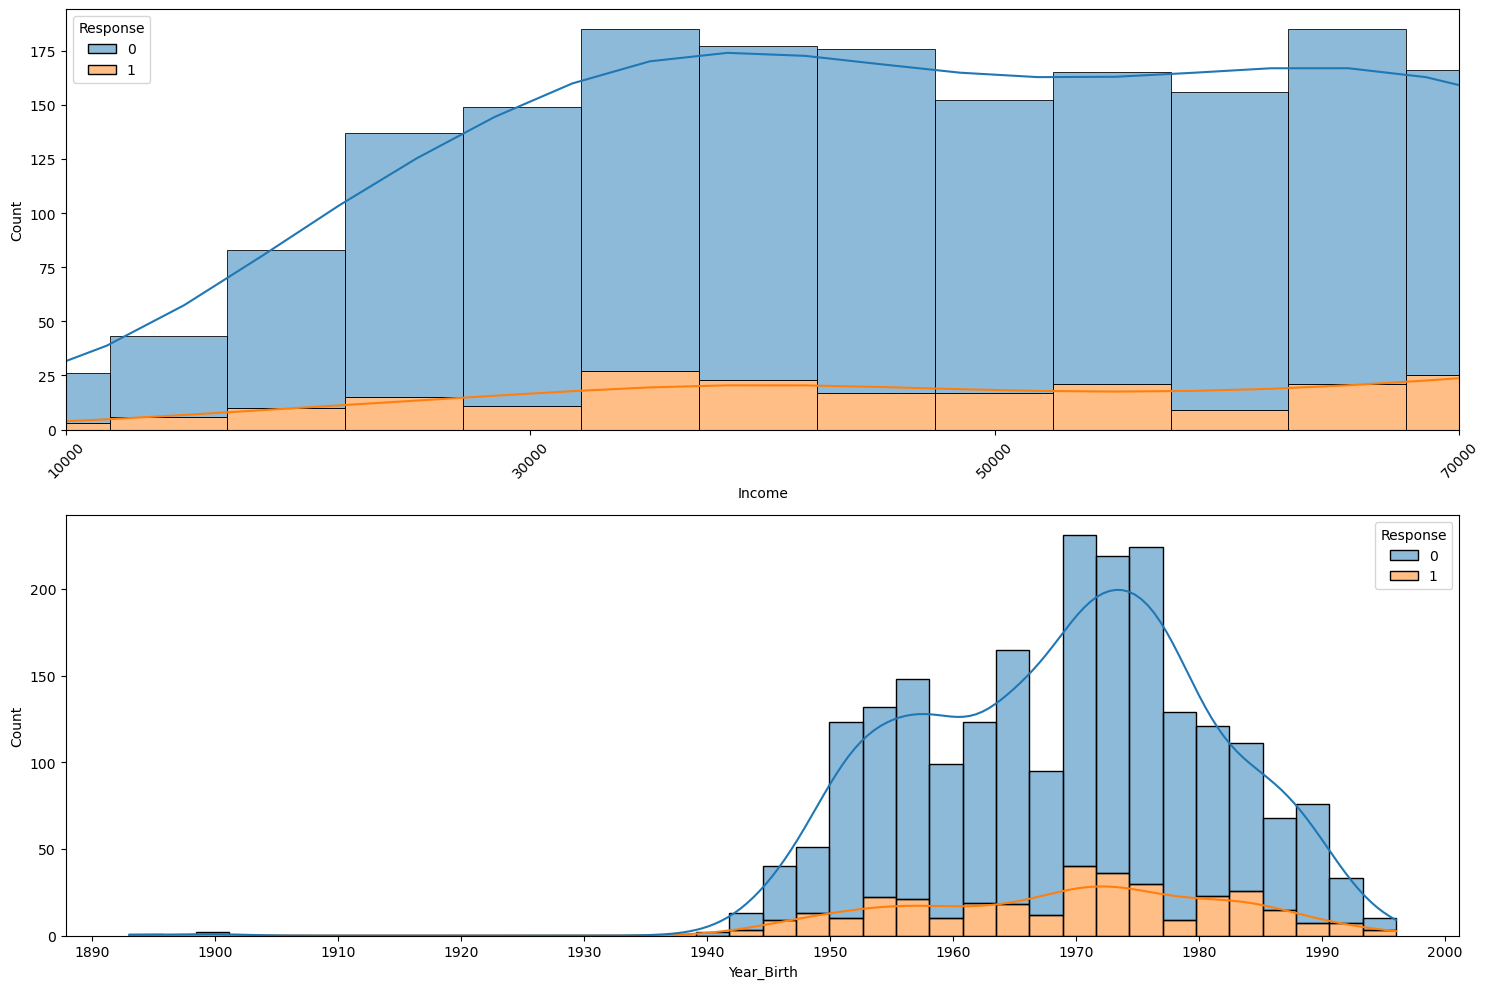

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

for i, col in enumerate(['Income', 'Year_Birth']): 
    sb.histplot(x=col, hue='Response', data=df, ax=axes[i], kde=True, multiple='stack')
    
    if i == 0:  # For 'Income'
        axes[i].set_xlim(10000, 70001)
        axes[i].set_xticks(range(10000, 70001, 20000)) 
        axes[i].tick_params(axis='x', rotation=45) # Use axes[i] instead of ax
    else:  # For 'Age'
        axes[i].set_xticks(range(1890, 2001, 10))  # Use axes[i] instead of ax

plt.tight_layout()


In [61]:
#encode catigorical values
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

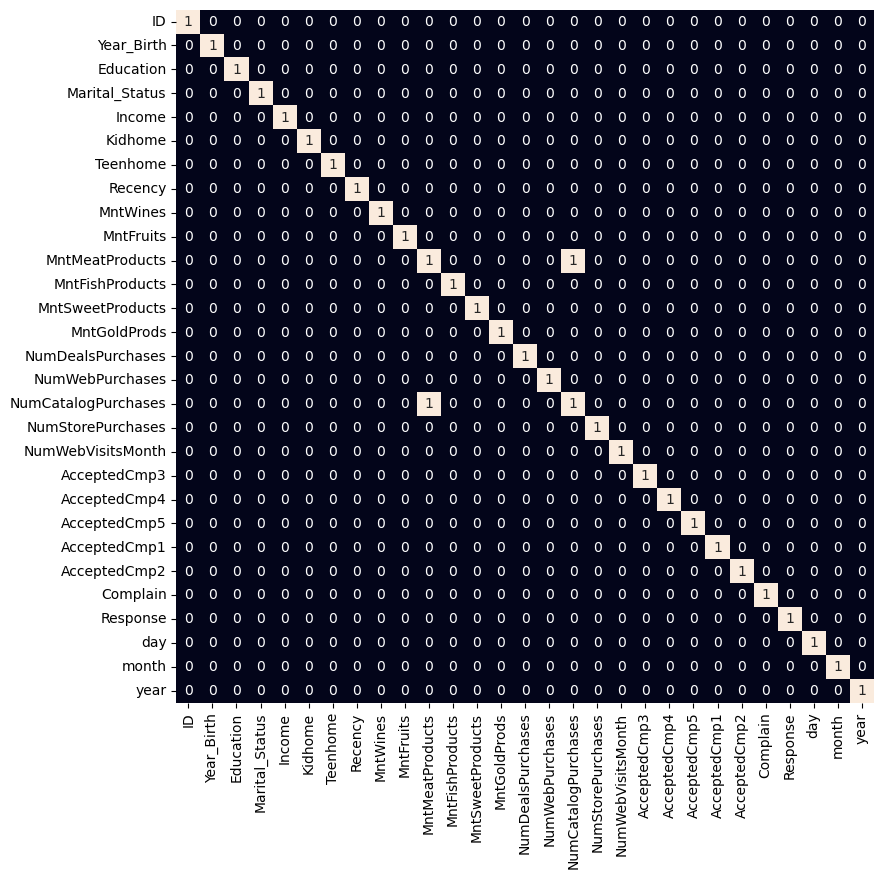

In [62]:
plt.figure(figsize=(9, 9))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [63]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

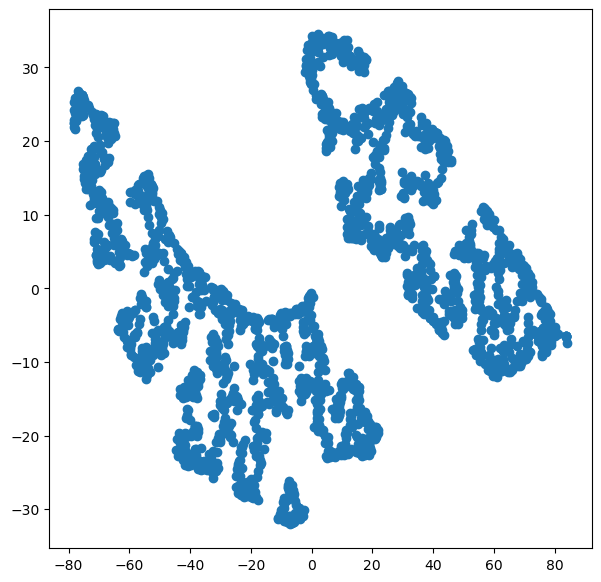

In [64]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [65]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(df)
    error.append(model.inertia_)

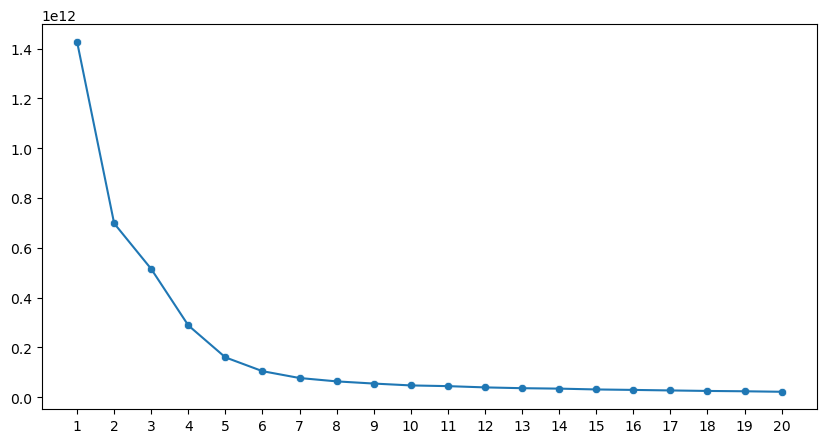

In [66]:
plt.figure(figsize=(10, 5))
ax = plt.gca() 
ax.set_xticks(range(1,21,1))
sb.lineplot(x=range(1, 21), y=error)
sb.scatterplot(x=range(1, 21), y=error)

plt.show()

In [67]:
model = KMeans(init='k-means++',
               n_clusters=6,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

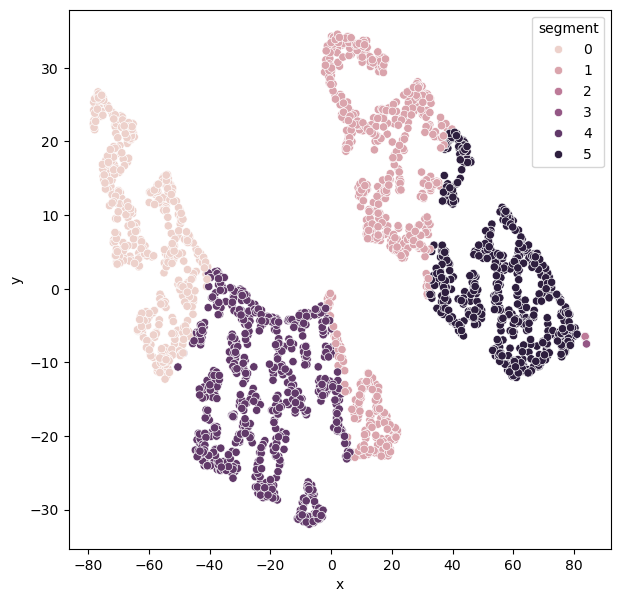

In [68]:
plt.figure(figsize=(7, 7))

df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})
# Use the DataFrame in the scatterplot function
sb.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()